In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


epoch_metrics = pd.read_csv("Fold_1_5_Epoch_Metrics.csv")
epoch_metrics.head()

,Epoch,Training Loss,Validation Loss,Training Accuracy,Validation Accuracy,Fold
0,0,5.8296,0.3594,0.7667,0.8653,Fold 1
1,1,5.7118,0.3365,0.8006,0.8753,Fold 1
2,2,5.6767,0.3225,0.8095,0.8667,Fold 1
3,3,5.6530,0.3223,0.8147,0.8753,Fold 1
4,4,5.6396,0.3217,0.8207,0.8653,Fold 1


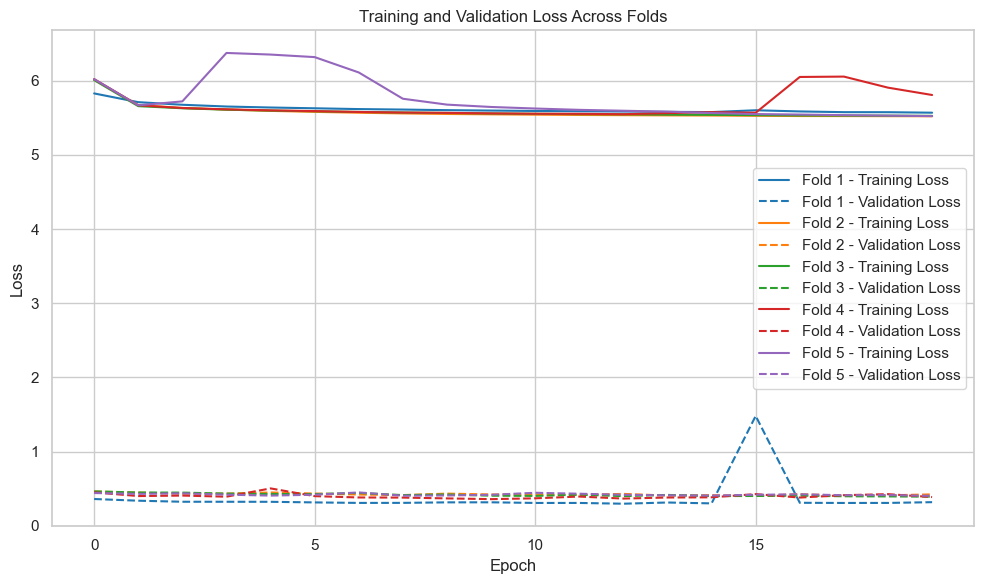

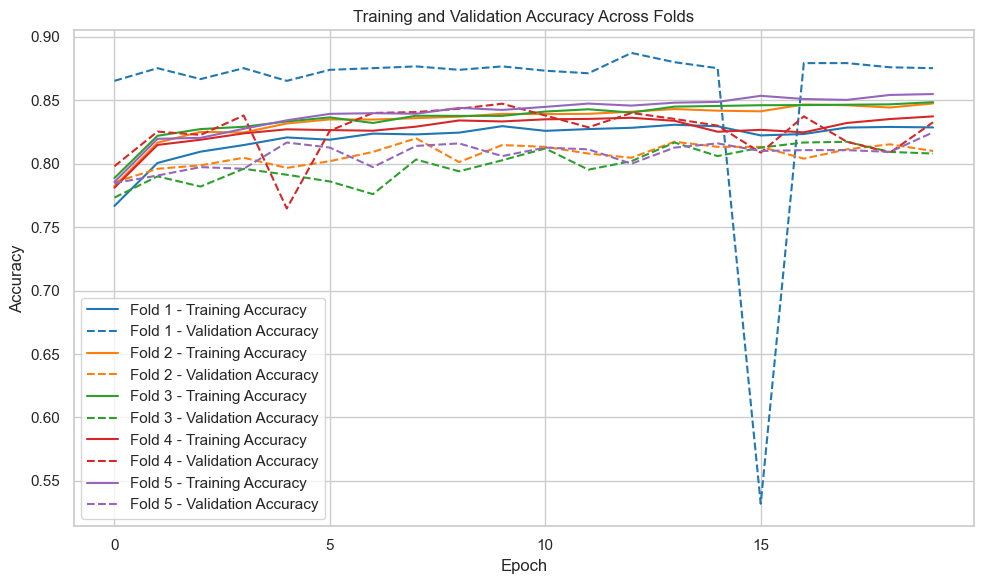

In [7]:
# Ensure the Fold column is integer and data is sorted
epoch_metrics_sorted = epoch_metrics.sort_values(by=['Fold', 'Epoch'])

# Melt for loss
loss_df = pd.melt(
    epoch_metrics_sorted,
    id_vars=['Epoch', 'Fold'],
    value_vars=['Training Loss', 'Validation Loss'],
    var_name='Type',
    value_name='Loss'
)

# Melt for accuracy
acc_df = pd.melt(
    epoch_metrics_sorted,
    id_vars=['Epoch', 'Fold'],
    value_vars=['Training Accuracy', 'Validation Accuracy'],
    var_name='Type',
    value_name='Accuracy'
)

# Map line styles
loss_df['LineStyle'] = loss_df['Type'].map({'Training Loss': 'solid', 'Validation Loss': 'dashed'})
acc_df['LineStyle'] = acc_df['Type'].map({'Training Accuracy': 'solid', 'Validation Accuracy': 'dashed'})


# Define a consistent color palette for the 5 folds
palette = sns.color_palette("tab10", n_colors=5)
fold_colors = {fold: palette[i] for i, fold in enumerate(sorted(loss_df['Fold'].unique()))}

# Plot Loss with consistent colors per fold
# Update plots with x-axis ticks every 5 epochs

# Determine the max epoch for setting ticks
max_epoch = epoch_metrics_sorted['Epoch'].max()
xticks = list(range(0, max_epoch + 1, 5))

# Plot Loss with updated x-axis ticks
plt.figure(figsize=(10, 6))
for fold in sorted(loss_df['Fold'].unique()):
    for typ in ['Training Loss', 'Validation Loss']:
        subset = loss_df[(loss_df['Fold'] == fold) & (loss_df['Type'] == typ)]
        linestyle = subset['LineStyle'].iloc[0]
        plt.plot(subset['Epoch'], subset['Loss'], label=f'{fold} - {typ}', linestyle=linestyle, color=fold_colors[fold])
plt.title('Training and Validation Loss Across Folds')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(xticks)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Accuracy with updated x-axis ticks
plt.figure(figsize=(10, 6))
for fold in sorted(acc_df['Fold'].unique()):
    for typ in ['Training Accuracy', 'Validation Accuracy']:
        subset = acc_df[(acc_df['Fold'] == fold) & (acc_df['Type'] == typ)]
        linestyle = subset['LineStyle'].iloc[0]
        plt.plot(subset['Epoch'], subset['Accuracy'], label=f'{fold} - {typ}', linestyle=linestyle, color=fold_colors[fold])
plt.title('Training and Validation Accuracy Across Folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(xticks)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [25]:
import pandas as pd

fold1 = pd.read_csv("experiment/plexus_detection/output/cm_saved/confusion_matrix_fold1.csv") 
fold2 = pd.read_csv("experiment/plexus_detection/output/cm_saved/confusion_matrix_fold2.csv")
fold3 = pd.read_csv("experiment/plexus_detection/output/cm_saved/confusion_matrix_fold3.csv")
fold4 = pd.read_csv("experiment/plexus_detection/output/cm_saved/confusion_matrix_fold4.csv")
fold5 = pd.read_csv("experiment/plexus_detection/output/cm_saved/confusion_matrix_fold5.csv")
fold1

,0,1
0,663,87
1,158,592


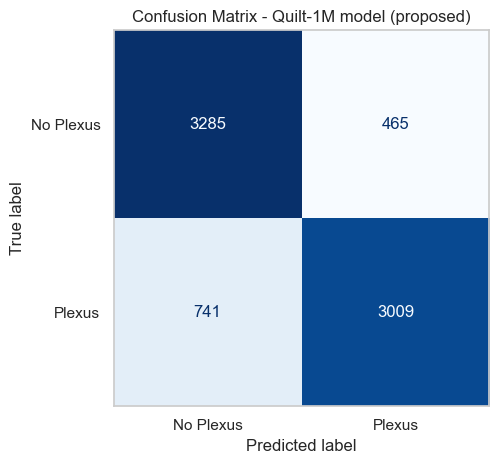

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

TN = fold1.iloc[0, 0] + fold2.iloc[0, 0] +  fold3.iloc[0, 0] + fold4.iloc[0, 0] + fold5.iloc[0, 0]
FP = fold1.iloc[0, 1] + fold2.iloc[0, 1] +  fold3.iloc[0, 1] + fold4.iloc[0, 1] + fold5.iloc[0, 1]  
FN = fold1.iloc[1, 0] + fold2.iloc[1, 0] +  fold3.iloc[1, 0] + fold4.iloc[1, 0] + fold5.iloc[1, 0]   
TP = fold1.iloc[1, 1] + fold2.iloc[1, 1] +  fold3.iloc[1, 1] + fold4.iloc[1, 1] + fold5.iloc[1, 1]  

cm = np.array([[TN, FP],
               [FN, TP]])

class_names = ['No Plexus', 'Plexus']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots()
disp.plot(ax=ax, cmap='Blues', colorbar=False)
ax.grid(False)
ax.set_title("Confusion Matrix - Quilt-1M model (proposed)")

plt.tight_layout()
plt.savefig("experiment/plexus_detection/output/cm_saved/confusion_matrix_all_folds.png")
plt.show()
plt.close()


In [40]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["No Plexus", "Plexus"],
            yticklabels=["No Plexus", "Plexus"])
plt.title("Confusion Matrix - Quilt-1M model (proposed)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

# Save the plot
cm_plot_path = "experiment/plexus_detection/output/cm_saved/confusion_matrix_all_folds.png"
plt.savefig(cm_plot_path)
plt.close()